In [ ]:
import pandas as pd
from io import StringIO

# Define the data as multi-line strings
data_week1 = """date,value
2022-01-07 00:00:00 UTC,0.074511357
2022-02-07 00:00:00 UTC,0.101800182
2022-03-07 00:00:00 UTC,0.113980879
2022-04-07 00:00:00 UTC,0.092549913
2022-05-07 00:00:00 UTC,0.099845605
2022-06-07 00:00:00 UTC,0.053652113
2022-07-07 00:00:00 UTC,0.159389898
2022-08-07 00:00:00 UTC,0.066465481
2022-09-07 00:00:00 UTC,0.071101924
2022-10-07 00:00:00 UTC,0.096713177
2022-11-07 00:00:00 UTC,0.073314475
2022-12-07 00:00:00 UTC,0.123054267
2023-01-07 00:00:00 UTC,0.084063185
2023-02-07 00:00:00 UTC,0.087155006
2023-03-07 00:00:00 UTC,0.082179288
2023-04-07 00:00:00 UTC,0.053949803
2023-05-07 00:00:00 UTC,0.070428374
2023-06-07 00:00:00 UTC,0.073321911
2023-07-07 00:00:00 UTC,0.129899491"""

data_week2 = """date,value
2022-01-14 00:00:00 UTC,0.341824566
2022-02-14 00:00:00 UTC,0.319703206
2022-03-14 00:00:00 UTC,0.324693874
2022-04-14 00:00:00 UTC,0.332494393
2022-05-14 00:00:00 UTC,0.343031754
2022-06-14 00:00:00 UTC,0.296743986
2022-07-14 00:00:00 UTC,0.395797232
2022-08-14 00:00:00 UTC,0.380019244
2022-09-14 00:00:00 UTC,0.302030634
2022-10-14 00:00:00 UTC,0.361754554
2022-11-14 00:00:00 UTC,0.312530555
2022-12-14 00:00:00 UTC,0.392727281
2023-01-14 00:00:00 UTC,0.304453999
2023-02-14 00:00:00 UTC,0.346246459
2023-03-14 00:00:00 UTC,0.308139458
2023-04-14 00:00:00 UTC,0.266882182
2023-05-14 00:00:00 UTC,0.291767202
2023-06-14 00:00:00 UTC,0.295343833
2023-07-14 00:00:00 UTC,0.380001749"""

data_week3 = """date,value
2022-01-21 00:00:00 UTC,0.513801991
2022-02-21 00:00:00 UTC,0.54231685
2022-03-21 00:00:00 UTC,0.554889603
2022-04-21 00:00:00 UTC,0.503485198
2022-05-21 00:00:00 UTC,0.608762351
2022-06-21 00:00:00 UTC,0.524846542
2022-07-21 00:00:00 UTC,0.62049175
2022-08-21 00:00:00 UTC,0.583646702
2022-09-21 00:00:00 UTC,0.508763045
2022-10-21 00:00:00 UTC,0.576939289
2022-11-21 00:00:00 UTC,0.517012743
2022-12-21 00:00:00 UTC,0.662616898
2023-01-21 00:00:00 UTC,0.553755554
2023-02-21 00:00:00 UTC,0.577395679
2023-03-21 00:00:00 UTC,0.545959941
2023-04-21 00:00:00 UTC,0.474301769
2023-05-21 00:00:00 UTC,0.532832859
2023-06-21 00:00:00 UTC,0.524138831
2023-07-21 00:00:00 UTC,0.580922898"""

data_week4 = """date,value
2022-01-28 00:00:00 UTC,0.779275547
2022-02-28 00:00:00 UTC,1.076569657
2022-03-28 00:00:00 UTC,0.818571284
2022-04-28 00:00:00 UTC,0.822410234
2022-05-28 00:00:00 UTC,0.8569717
2022-06-28 00:00:00 UTC,0.759287087
2022-07-28 00:00:00 UTC,0.851839315
2022-08-28 00:00:00 UTC,0.786218307
2022-09-28 00:00:00 UTC,0.754574687
2022-10-28 00:00:00 UTC,0.865070609
2022-11-28 00:00:00 UTC,0.763795315
2022-12-28 00:00:00 UTC,0.877086676
2023-01-28 00:00:00 UTC,0.765635132
2023-02-28 00:00:00 UTC,0.980726024
2023-03-28 00:00:00 UTC,0.855755472
2023-04-28 00:00:00 UTC,0.854506272
2023-05-28 00:00:00 UTC,0.809101101
2023-06-28 00:00:00 UTC,0.749874681
2023-07-28 00:00:00 UTC,0.879999207"""

# Read the data into DataFrames
df_week1 = pd.read_csv(StringIO(data_week1), parse_dates=['date'])
df_week2 = pd.read_csv(StringIO(data_week2), parse_dates=['date'])
df_week3 = pd.read_csv(StringIO(data_week3), parse_dates=['date'])
df_week4 = pd.read_csv(StringIO(data_week4), parse_dates=['date'])

# Add a 'week' column to identify the week number
df_week1['week'] = 'Week 1'
df_week2['week'] = 'Week 2'
df_week3['week'] = 'Week 3'
df_week4['week'] = 'Week 4'


In [ ]:
# Concatenate the DataFrames
df = pd.concat([df_week1, df_week2, df_week3, df_week4], ignore_index=True)


In [ ]:
# Remove timezone information if present
df['date'] = df['date'].dt.tz_localize(None)

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Use the 'week' column we added earlier
df['week_of_month'] = df['week']


In [ ]:
# Group the data
grouped = df.groupby(['year', 'month', 'week_of_month']).agg({'value': list}).reset_index()

# Sort the DataFrame
grouped.sort_values(by=['year', 'month', 'week_of_month'], inplace=True)

# Display the result
print(grouped)


    year  month week_of_month          value
0   2022      1        Week 1  [0.074511357]
1   2022      1        Week 2  [0.341824566]
2   2022      1        Week 3  [0.513801991]
3   2022      1        Week 4  [0.779275547]
4   2022      2        Week 1  [0.101800182]
..   ...    ...           ...            ...
71  2023      6        Week 4  [0.749874681]
72  2023      7        Week 1  [0.129899491]
73  2023      7        Week 2  [0.380001749]
74  2023      7        Week 3  [0.580922898]
75  2023      7        Week 4  [0.879999207]

[76 rows x 4 columns]


week_of_month    Week 1    Week 2    Week 3    Week 4
year month                                           
2022 1         0.074511  0.341825  0.513802  0.779276
     2         0.101800  0.319703  0.542317  1.076570
     3         0.113981  0.324694  0.554890  0.818571
     4         0.092550  0.332494  0.503485  0.822410
     5         0.099846  0.343032  0.608762  0.856972
     6         0.053652  0.296744  0.524847  0.759287
     7         0.159390  0.395797  0.620492  0.851839
     8         0.066465  0.380019  0.583647  0.786218
     9         0.071102  0.302031  0.508763  0.754575
     10        0.096713  0.361755  0.576939  0.865071
     11        0.073314  0.312531  0.517013  0.763795
     12        0.123054  0.392727  0.662617  0.877087
2023 1         0.084063  0.304454  0.553756  0.765635
     2         0.087155  0.346246  0.577396  0.980726
     3         0.082179  0.308139  0.545960  0.855755
     4         0.053950  0.266882  0.474302  0.854506
     5         0.070428  0.2

<Axes: title={'center': 'Weekly Values per Month'}, xlabel='year,month'>

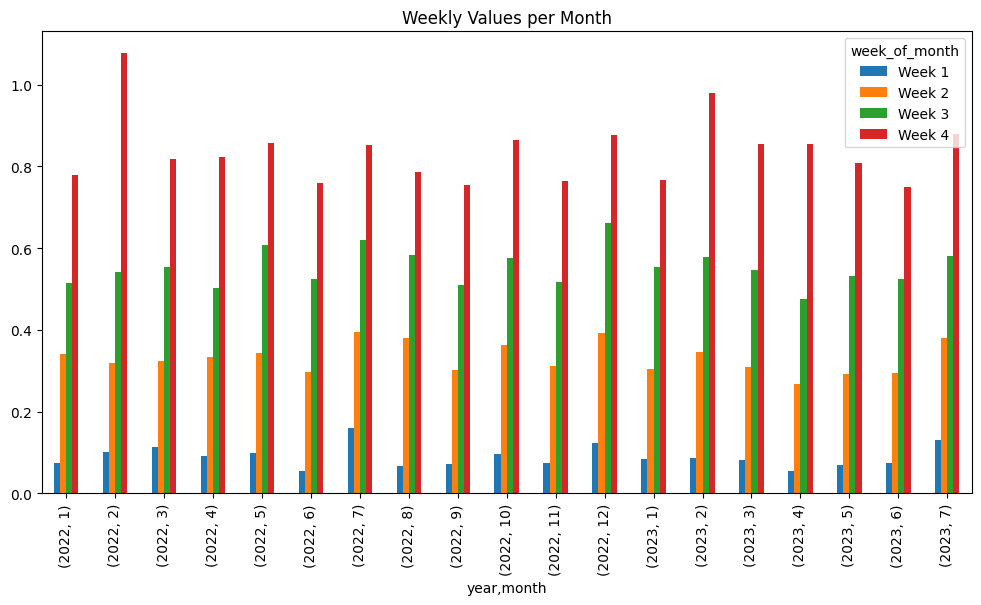

In [ ]:
# Create a pivot table
pivot_table = df.pivot_table(values='value', index=['year', 'month'], columns='week_of_month')

# Display the pivot table
print(pivot_table)

# Plot the data
pivot_table.plot(kind='bar', figsize=(12,6), title='Weekly Values per Month')


In [ ]:
# Export to CSV
grouped.to_csv('organized_time_series.csv', index=False)


  8%|▊         | 4/48 [00:00<00:08,  5.31it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 19%|█▉        | 9/48 [00:01<00:08,  4.87it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 23%|██▎       | 11/48 [00:01<00:05,  6.46it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 27%|██▋       | 13/48 [00:02<00:05,  5.86it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramet

Best ARIMA Model: Order=(3, 0, 3), AIC=-158.81031584326422


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


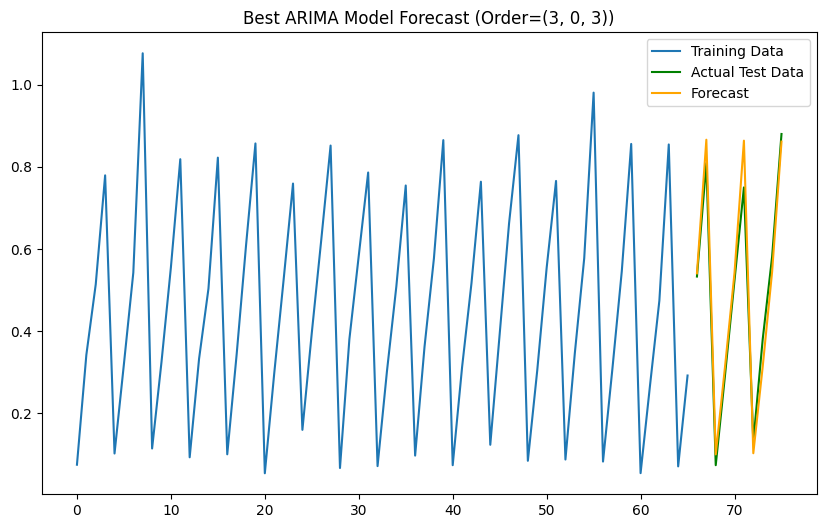

Mean Squared Error: 0.002459111913171629


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm  # For progress bar
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel('/content/organized_time_series.xlsx')

# Transform data into time series format
data = data.explode(['date', 'value'])  # Expand lists into individual rows
data['date'] = pd.to_datetime(data['date'])  # Ensure date column is datetime
data = data.sort_values('date')

# Aggregate data by week
weekly_data = data.groupby('date')['value'].mean().reset_index()

# Split data into train and test sets
train = weekly_data.iloc[:-1]['value']  # Last 10 weeks for testing
test = weekly_data.iloc[-1:]['value']

# Define ARIMA hyperparameter ranges
p_values = range(0, 4)
d_values = range(0, 3)
q_values = range(0, 4)

# List to store AIC values and parameters
results = []
total_combinations = len(p_values) * len(d_values) * len(q_values)

# Progress bar
with tqdm(total=total_combinations) as pbar:
    for p in p_values:
        for d in d_values:
            for q in q_values:
                pbar.update(1)
                try:
                    # Fit ARIMA model
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    # Store the AIC and parameters
                    results.append({
                        'order': (p, d, q),
                        'AIC': model_fit.aic
                    })
                except:
                    # Handle cases where the model fails to converge
                    continue

# Find the best model based on AIC
best_model = min(results, key=lambda x: x['AIC'])
print(f"Best ARIMA Model: Order={best_model['order']}, AIC={best_model['AIC']}")

# Fit the best ARIMA model
best_order = best_model['order']
final_model = ARIMA(train, order=best_order)
final_model_fit = final_model.fit()

# Forecast future values
forecast = final_model_fit.forecast(steps=10)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(len(train)), train, label="Training Data")
plt.plot(range(len(train), len(train) + len(test)), test, label="Actual Test Data", color="green")
plt.plot(range(len(train), len(train) + len(forecast)), forecast, label="Forecast", color="orange")
plt.title(f"Best ARIMA Model Forecast (Order={best_order})")
plt.legend()
plt.show()

# Evaluate model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")


  6%|▋         | 3/48 [00:00<00:02, 17.23it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 27%|██▋       | 13/48 [00:03<00:16,  2.08it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 

Best ARIMA Model: Order=(3, 0, 3), AIC=-242.86829710208542


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         date  actual_value  predicted_value
0  2024-06-07      0.066443         0.094089
1  2024-06-14      0.311680         0.280192
2  2024-06-21      0.561592         0.510615
3  2024-06-28      0.956001         1.009263
4  2024-07-07      0.118614         0.098314
5  2024-07-14      0.326981         0.279148
6  2024-07-21      0.547867         0.508305
7  2024-07-28      1.023117         1.008388
8  2024-08-07      0.072743         0.102523
9  2024-08-14      0.319935         0.278133
10 2024-08-21      0.523988         0.506002
11 2024-08-28      0.999840         1.007495
12 2024-09-07      0.058892         0.106714
13 2024-09-14      0.303168         0.277145
14 2024-09-21      0.528781         0.503704
15 2024-09-28      0.967107         1.006586
16 2024-10-07      0.065817         0.110889
17 2024-10-14      0.245468         0.276185
18 2024-10-21      0.450860         0.501413
19 2024-10-28      1.016000         1.005659
20 2024-11-07      0.052496         0.115047
21 2024-11

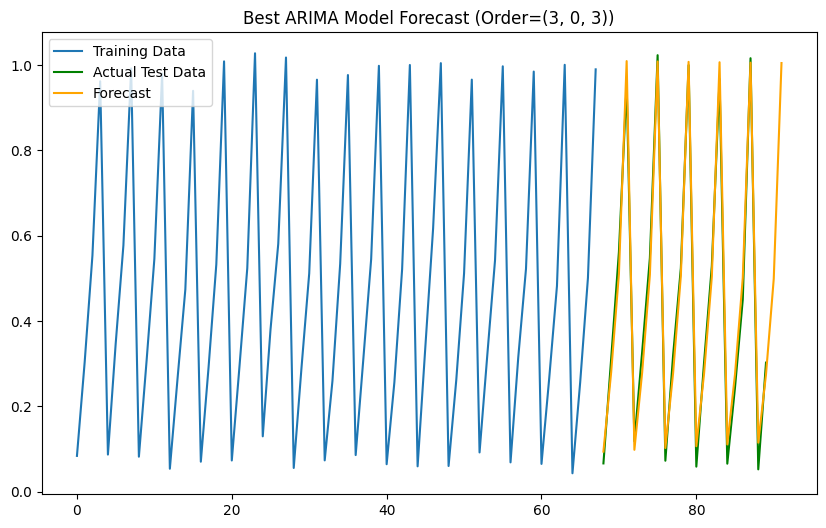

ValueError: Input contains NaN.

In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm  # For progress bar
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load your data
data = pd.read_excel('/content/organized_time_series.xlsx')

# Transform data into time series format
data = data.explode(['date', 'value'])  # Expand lists into individual rows
data['date'] = pd.to_datetime(data['date'])  # Ensure date column is datetime
data = data.sort_values('date')

# Aggregate data by week
weekly_data = data.groupby('date')['value'].mean().reset_index()

# Split data into train and test sets
train = weekly_data.iloc[:-24]['value']  # Last 10 weeks for testing
test = weekly_data.iloc[-24:]['value']

# Define ARIMA hyperparameter ranges
p_values = range(0, 4)
d_values = range(0, 3)
q_values = range(0, 4)

# List to store AIC values and parameters
results = []
total_combinations = len(p_values) * len(d_values) * len(q_values)

# Progress bar
with tqdm(total=total_combinations) as pbar:
    for p in p_values:
        for d in d_values:
            for q in q_values:
                pbar.update(1)
                try:
                    # Fit ARIMA model
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    # Store the AIC and parameters
                    results.append({
                        'order': (p, d, q),
                        'AIC': model_fit.aic
                    })
                except:
                    # Handle cases where the model fails to converge
                    continue

# Find the best model based on AIC
best_model = min(results, key=lambda x: x['AIC'])
print(f"Best ARIMA Model: Order={best_model['order']}, AIC={best_model['AIC']}")

# Fit the best ARIMA model
best_order = best_model['order']
final_model = ARIMA(train, order= best_order)
final_model_fit = final_model.fit()
#    best_order
# Forecast future values
forecast = final_model_fit.forecast(steps=24)

# Get the dates for the forecasted periods
test_dates = weekly_data.iloc[-24:]['date'].reset_index(drop=True)

# Create a DataFrame with dates, actual values, and predicted values
predicted_df = pd.DataFrame({
    'date': test_dates,
    'actual_value': test.reset_index(drop=True),
    'predicted_value': forecast.values
})

# Print the DataFrame
print(predicted_df)





# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(len(train)), train, label="Training Data")
plt.plot(range(len(train), len(train) + len(test)), test, label="Actual Test Data", color="green")
plt.plot(range(len(train), len(train) + len(forecast)), forecast, label="Forecast", color="orange")
plt.title(f"Best ARIMA Model Forecast (Order={best_order})")
plt.legend()
plt.show()

# Evaluate model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")


In [5]:
# Write the DataFrame to an Excel file
file_path = "/content/predicted_values.xlsx"
predicted_df.to_excel(file_path, index=False)

file_path

'/content/predicted_values.xlsx'

In [ ]:
print(test)

75    0.101765
Name: value, dtype: float64
